In [3]:
pip install wheel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


## Gathering reference traces

In [3]:
import numpy as np
import pickle

all_traces = np.empty((0, 5000))  # create empty array to store concatenated traces
all_labels = np.empty(0, dtype=int)  # create empty array to store concatenated labels

for i in range(1, 30):
    file_path = f"reftraces/200reftrace_first entry_{i}.pkl"
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in).transpose()
        label = np.full(200, i)
        
        all_traces = np.concatenate((all_traces, trace), axis=0)
        all_labels = np.concatenate((all_labels, label), axis=0)


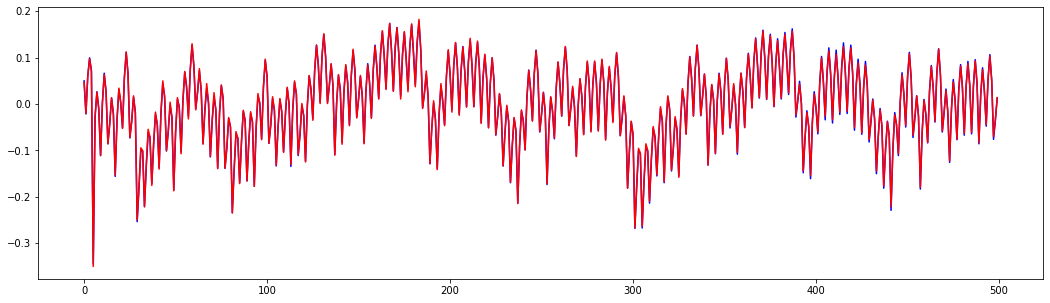

In [4]:
# Plot the traces
import matplotlib.pyplot as plt


plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(all_traces[10][0:500], color = 'blue')# Not a specific slice, this is just an exampleto plot the trace
plt.plot(all_traces[120][0:500], color = 'red') 
plt.show()


## ML side-channel analysis

In [5]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_traces, all_labels, test_size=0.2)

from sklearn.neural_network import MLPClassifier 

Dec_clf = MLPClassifier(
    random_state=42,
    solver='adam', 
    learning_rate='adaptive',
    max_iter=3000,
    hidden_layer_sizes=[400],
    batch_size=500,
    alpha=0.0001, # set alpha for L2 regularization
    early_stopping=True,
    n_iter_no_change=1000,
    verbose=False, 
)


In [ ]:
Dec_clf.fit(X_train, y_train)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(all_traces, all_labels, test_size=0.2)

predictions =np.zeros(len(y_test))
predictions = Dec_clf.predict(X_test)
success = 0

for i in range(len(y_test)):
    if predictions[i] == y_test[i]: 
        success = success +1
    #else:
        #print(predictions[i], y_test['i])
 
         
print((success /len(y_test))*100)

100.0


In [99]:
success = 0
for i in range(len(y_test)):
    if predictions[i] == y_test[i]: 
        success = success +1
    else:
        print(predictions[i], y_test[i])
 
         
print((success /len(y_test))*100)

100.0


In [100]:
predictions[0:10]

array([13, 28, 21, 11,  9,  5, 24, 15, 17,  3])

### Attack phase

In [147]:
attack_traces = np.empty((2, 5000))  # create empty array to store concatenated traces
attack_labels = np.empty(2, dtype=int)  # create empty array to store concatenated labels

for i in range(0, 2):
    
    file_path_labels = f"attacktraces/oilvector_{i}.pkl"
    with open(file_path_labels, "rb") as pickle_in_labels:
        label = pickle.load(pickle_in_labels) 
        print(label)
        attack_labels[i] = label[0]
        
    file_path = f"attacktraces/attacktrace_{i}.pkl"
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in)#.transpose()
        attack_traces[i] = trace[0]


[23, 27, 26, 5, 3, 21, 23, 9, 11, 5, 11, 22, 14, 1, 25, 21, 17, 29, 22, 11, 13, 19, 7, 3, 9, 28, 2, 16, 10, 7, 24, 24, 7, 30, 8, 14, 29, 0, 8, 17, 16, 0, 27, 19, 8, 11, 16, 21, 24, 22, 14, 30, 5, 27, 12, 23, 25, 30, 29, 30, 28, 23, 17, 4, 13, 3, 24, 26, 1, 27, 13, 23, 26, 4, 3, 1, 23, 22, 4, 23, 11, 25, 17, 19, 19, 16, 28]
[1, 27, 28, 1, 15, 6, 28, 9, 13, 2, 20, 10, 13, 10, 12, 9, 8, 26, 19, 2, 10, 23, 11, 1, 11, 24, 13, 4, 8, 17, 17, 0, 13, 17, 23, 6, 0, 26, 23, 13, 12, 5, 15, 15, 13, 26, 23, 27, 27, 18, 23, 11, 3, 5, 20, 6, 0, 23, 25, 21, 28, 25, 21, 18, 0, 15, 13, 25, 1, 15, 29, 13, 7, 16, 11, 4, 25, 12, 19, 7, 6, 17, 12, 10, 16, 14, 8]


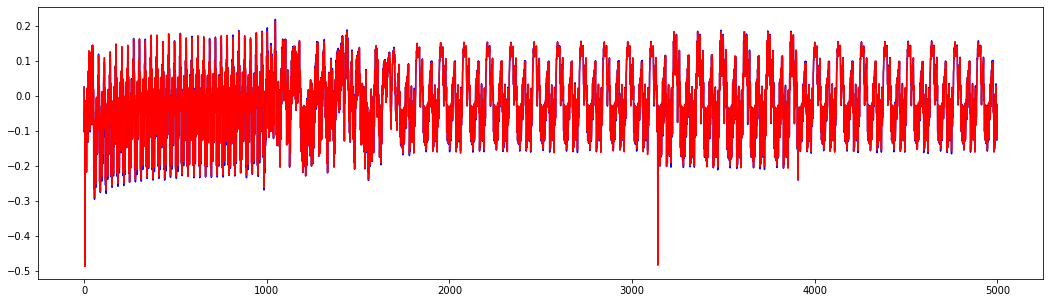

In [148]:
# Plot the traces
import matplotlib.pyplot as plt


plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(attack_traces[0], color = 'blue')# Not a specific slice, this is just an exampleto plot the trace
plt.plot(attack_traces[1], color = 'red') 
plt.show()

In [149]:
predictions= Dec_clf.predict(attack_traces)


In [150]:
predictions

array([1, 1])

In [132]:
predictions = Dec_clf.predict(attack_traces)
success = 0
for i in range(29):
    if predictions[i] == attack_labels[i]: 
        success = success +1
        print("Correct:", predictions[i], attack_labels[i])
    else:
        print("Wrong:", predictions[i], attack_labels[i])
 
         
print((success /len(attack_traces))*100)

Wrong: 1 13
Wrong: 1 11
Wrong: 1 3
Wrong: 1 19
Wrong: 1 12
Wrong: 1 26
Wrong: 1 11
Wrong: 1 29
Wrong: 1 23
Wrong: 1 26
Correct: 1 1
Correct: 1 1
Wrong: 1 2
Wrong: 1 8
Wrong: 1 2
Wrong: 1 4
Wrong: 1 4
Wrong: 1 9
Correct: 1 1
Wrong: 1 8
Wrong: 1 2
Wrong: 1 7
Wrong: 1 2
Wrong: 1 2
Wrong: 1 2
Wrong: 1 2
Correct: 1 1
Correct: 1 1
Wrong: 1 4
10.0


In [133]:
10000/10

1000.0

1000*2.5

In [134]:
1000 * 2.5

2500.0